# Exploratory Data Analysis #1

### Import libraries

In [4]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import sqlite3 

import os

import networkx as nx




In [5]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder


### Import data

In [22]:
historical_fiction_books = pd.read_csv('../../data/scrape/historical-fiction_book_table.csv')
historical_fiction_reviews = pd.read_csv('../../data/scrape/historical-fiction_review_table.csv')

In [23]:
print(historical_fiction_books.info())
print(historical_fiction_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             43 non-null     object 
 1   title             43 non-null     object 
 2   author            43 non-null     object 
 3   pages             43 non-null     object 
 4   unique_key        43 non-null     object 
 5   average_rating    43 non-null     float64
 6   book_description  33 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        7467 non-null   object
 1   user_unique_key  7467 non-null   object
 2   number_of_stars  7467 non-null   int64 
 3   book_unique_key  7467 non-null   object
 4   review_text      7357 non-null   obje

In [24]:
science_fiction_fantasy_books = pd.read_csv('../../data/scrape/science-fiction-fantasy_book_table.csv')
science_fiction_fantasy_reviews = pd.read_csv('../../data/scrape/science-fiction-fantasy_review_table.csv')
science_fiction_fantasy= science_fiction_fantasy_books.merge(science_fiction_fantasy_reviews, left_on='unique_key', right_on='book_unique_key')

In [25]:
romantic_books = pd.read_csv('../../data/scrape/romantic_book_table.csv')
romantic_reviews = pd.read_csv('../../data/scrape/romantic_review_table.csv')
romantic= romantic_books.merge(romantic_reviews, left_on='unique_key', right_on='book_unique_key')

In [26]:
poetry_books = pd.read_csv('../../data/scrape/poetry_book_table.csv')
poetry_reviews = pd.read_csv('../../data/scrape/poetry_review_table.csv')
poetry= poetry_books.merge(poetry_reviews, left_on='unique_key', right_on='book_unique_key')

In [27]:
novella_books = pd.read_csv('../../data/scrape/novella_book_table.csv')
novella_reviews = pd.read_csv('../../data/scrape/novella_review_table.csv')
novella= novella_books.merge(novella_reviews, left_on='unique_key', right_on='book_unique_key')

In [28]:
nonfiction_books = pd.read_csv('../../data/scrape/non-fiction_book_table.csv')
nonfiction_reviews = pd.read_csv('../../data/scrape/non-fiction_review_table.csv')
nonfiction= nonfiction_books.merge(nonfiction_reviews, left_on='unique_key', right_on='book_unique_key')

In [29]:
historypolitics_books = pd.read_csv('../../data/scrape/history-and-politics_book_table.csv')
historypolitics_reviews = pd.read_csv('../../data/scrape/history-and-politics_review_table.csv')
historypolitics= historypolitics_books.merge(historypolitics_reviews, left_on='unique_key', right_on='book_unique_key')

In [30]:
fiction_books = pd.read_csv('../../data/scrape/fiction_book_table.csv')
fiction_reviews = pd.read_csv('../../data/scrape/fiction_review_table.csv')
fiction= fiction_books.merge(fiction_reviews, left_on='unique_key', right_on='book_unique_key')

In [31]:
contemporary_books = pd.read_csv('../../data/scrape/contemporary_book_table.csv')
contemporary_reviews = pd.read_csv('../../data/scrape/contemporary_review_table.csv')
contemporary= contemporary_books.merge(contemporary_reviews, left_on='unique_key', right_on='book_unique_key')

In [32]:
biomemoir_books = pd.read_csv('../../data/scrape/biography-memoir_book_table.csv')
biomemoir_reviews = pd.read_csv('../../data/scrape/biography-memoir_review_table.csv')
biomemoir= biomemoir_books.merge(biomemoir_reviews, left_on='unique_key', right_on='book_unique_key')

In [33]:
anthologies_books = pd.read_csv('../../data/scrape/anthologies_book_table.csv')
anthologies_reviews = pd.read_csv('../../data/scrape/anthologies_review_table.csv')
anthologies= anthologies_books.merge(anthologies_reviews, left_on='unique_key', right_on='book_unique_key')

In [34]:
mystery_books = pd.read_csv('../../data/scrape/mystery_book_table.csv')
mystery_reviews = pd.read_csv('../../data/scrape/mystery_review_table.csv')
mystery= mystery_books.merge(mystery_reviews, left_on='unique_key', right_on='book_unique_key')

In [35]:
shortstories_books = pd.read_csv('../../data/scrape/short-stories_book_table.csv')
shortstories_reviews = pd.read_csv('../../data/scrape/short-stories_review_table.csv')
short_stories= shortstories_books.merge(shortstories_reviews, left_on='unique_key', right_on='book_unique_key')

In [36]:
classics_books = pd.read_csv('../../data/scrape/classics_book_table.csv')
classics_reviews = pd.read_csv('../../data/scrape/classics_review_table.csv')
classics= classics_books.merge(classics_reviews, left_on='unique_key', right_on='book_unique_key')

In [39]:
anthologies_books = pd.read_csv('../../data/scrape/anthologies_book_table.csv')
anthologies_reviews = pd.read_csv('../../data/scrape/anthologies_review_table.csv')
anthologies= anthologies_books.merge(anthologies_reviews, left_on='unique_key', right_on='book_unique_key')

In [62]:
drama_books = pd.read_csv('../../data/scrape/drama_book_table.csv')
drama_reviews = pd.read_csv('../../data/scrape/drama_review_table.csv')
drama= drama_books.merge(drama_reviews, left_on='unique_key', right_on='book_unique_key')

In [63]:
literature_books = pd.read_csv('../../data/scrape/literature_book_table.csv')
literature_reviews = pd.read_csv('../../data/scrape/literature_review_table.csv')
literature= literature_books.merge(literature_reviews, left_on='unique_key', right_on='book_unique_key')

In [171]:
adventure_books = pd.read_csv('../../data/scrape/adventure_book_table.csv')
adventure_reviews = pd.read_csv('../../data/scrape/adventure_review_table.csv')
adventure= adventure_books.merge(adventure_reviews, left_on='unique_key', right_on='book_unique_key')

In [45]:
poetry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4721 entries, 0 to 4720
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             4721 non-null   object 
 1   title             4721 non-null   object 
 2   author            4721 non-null   object 
 3   pages             4721 non-null   object 
 4   unique_key        4721 non-null   object 
 5   average_rating    4721 non-null   float64
 6   book_description  3970 non-null   object 
 7   user_name         4721 non-null   object 
 8   user_unique_key   4721 non-null   object 
 9   number_of_stars   4721 non-null   int64  
 10  book_unique_key   4721 non-null   object 
 11  review_text       4657 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 479.5+ KB


### Merge tables

In [37]:
historical_fiction= historical_fiction_books.merge(historical_fiction_reviews, left_on='unique_key', right_on='book_unique_key')

In [213]:
historical_fiction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 0 to 7466
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             7467 non-null   object 
 1   title             7467 non-null   object 
 2   author            7467 non-null   object 
 3   pages             7467 non-null   object 
 4   unique_key        7467 non-null   object 
 5   average_rating    7467 non-null   float64
 6   book_description  5667 non-null   object 
 7   user_name         7467 non-null   object 
 8   user_unique_key   7467 non-null   object 
 9   number_of_stars   7467 non-null   int64  
 10  book_unique_key   7467 non-null   object 
 11  review_text       7357 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 758.4+ KB


In [214]:
science_fiction_fantasy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 0 to 6391
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             6392 non-null   object 
 1   title             6392 non-null   object 
 2   author            6392 non-null   object 
 3   pages             6392 non-null   object 
 4   unique_key        6392 non-null   object 
 5   average_rating    6392 non-null   float64
 6   book_description  3842 non-null   object 
 7   user_name         6392 non-null   object 
 8   user_unique_key   6392 non-null   object 
 9   number_of_stars   6392 non-null   int64  
 10  book_unique_key   6392 non-null   object 
 11  review_text       6238 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 649.2+ KB


In [5]:
trying = pd.concat([historical_fiction, science_fiction_fantasy], axis = 0)

In [215]:
trying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13859 entries, 0 to 6391
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             13859 non-null  object 
 1   title             13859 non-null  object 
 2   author            13859 non-null  object 
 3   pages             13859 non-null  object 
 4   unique_key        13859 non-null  object 
 5   average_rating    13859 non-null  float64
 6   book_description  9509 non-null   object 
 7   user_name         13859 non-null  object 
 8   user_unique_key   13859 non-null  object 
 9   number_of_stars   13859 non-null  int64  
 10  book_unique_key   13859 non-null  object 
 11  review_text       13595 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.4+ MB


In [60]:
trying.head(63)

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",chai ♡,https://www.goodreads.com/user/show/42130592-chai,0,https://www.goodreads.com/book/show/49504061-t...,You had me at WITCHES and ALIX E. HARROW.
1,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Teodora,https://www.goodreads.com/user/show/69603149-t...,3,https://www.goodreads.com/book/show/49504061-t...,NaN
2,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Paromjit,https://www.goodreads.com/user/show/38610813-p...,5,https://www.goodreads.com/book/show/49504061-t...,Alix E Harrow replicates the wondrous magic of...
3,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",jessica,https://www.goodreads.com/user/show/10171516-j...,4,https://www.goodreads.com/book/show/49504061-t...,‘she thinks of the ways people make for themse...
4,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Petrik,https://www.goodreads.com/user/show/59458347-p...,4,https://www.goodreads.com/book/show/49504061-t...,ARC provided by the publisher—Orbit—in exchang...
...,...,...,...,...,...,...,...,...,...,...,...,...
58,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Kaitlyn,https://www.goodreads.com/user/show/75140453-k...,5,https://www.goodreads.com/book/show/49504061-t...,My playlist for the book (enjoy!): HERE\n\nDid...
59,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Vigasia,https://www.goodreads.com/user/show/61295798-v...,5,https://www.goodreads.com/book/show/49504061-t...,This is the best book about women power I've e...
60,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Celeste,https://www.goodreads.com/user/show/7317186-ce...,4,https://www.goodreads.com/book/show/49504061-t...,I’d like to thank the publisher (Orbit/Redhook...
61,historical-fiction,The Once and Future Witches,by Alix E. Harrow (Goodreads Author),528 pages,https://www.goodreads.com/book/show/49504061-t...,4.19,"In 1893, there's no such thing as witches. The...",Barbara,https://www.goodreads.com/user/show/11701608-b...,5,https://www.goodreads.com/book/show/49504061-t...,Suffragists! Witches! Folklore! I’m in!! Autho...


In [222]:
trying.sort_values('review_text')

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
463,science-fiction-fantasy,Kingdom of the Wicked,by Kerri Maniscalco (Goodreads Author),448 pages,https://www.goodreads.com/book/show/52735921-k...,4.16,Two sisters.\n\nOne brutal murder.\n\nA quest ...,Lia Carstairs,https://www.goodreads.com/user/show/75966379-l...,5,https://www.goodreads.com/book/show/52735921-k...,"""One day you'll call me Death. \nFor now, Wr..."
373,historical-fiction,Kingdom of the Wicked,by Kerri Maniscalco (Goodreads Author),448 pages,https://www.goodreads.com/book/show/52735921-k...,4.16,Two sisters.\n\nOne brutal murder.\n\nA quest ...,Lia Carstairs,https://www.goodreads.com/user/show/75966379-l...,5,https://www.goodreads.com/book/show/52735921-k...,"""One day you'll call me Death. \nFor now, Wr..."
2367,historical-fiction,Where the Crawdads Sing,by Delia Owens (Goodreads Author),384 pages,https://www.goodreads.com/book/show/36809135-w...,4.47,"For years, rumors of the “Marsh Girl” haunted ...",Erin,https://www.goodreads.com/user/show/17957823-erin,3,https://www.goodreads.com/book/show/36809135-w...,Audiobook narrated by Cassandra Campbell 12hr...
6639,historical-fiction,Gone with the Wind,by Margaret Mitchell,1037 pages,https://www.goodreads.com/book/show/18405.Gone...,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",Alexia,https://www.goodreads.com/user/show/55506205-a...,5,https://www.goodreads.com/book/show/18405.Gone...,! Parental advisory: strong language !\n\nI'm ...
2992,historical-fiction,American Dirt,by Jeanine Cummins (Goodreads Author),400 pages,https://www.goodreads.com/book/show/45046527-a...,4.31,"También de este lado hay sueños. On this side,...",Cheri,https://www.goodreads.com/user/show/106692-cheri,5,https://www.goodreads.com/book/show/45046527-a...,!! NOW AVAILABLE !!\n\n4.5 Stars\n\nBeginning ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6164,science-fiction-fantasy,Harry Potter and the Half-Blood Prince,by J.K. Rowling,652 pages,https://www.goodreads.com/book/show/1.Harry_Po...,4.57,NaN,Paula W,https://www.goodreads.com/user/show/13286533-p...,5,https://www.goodreads.com/book/show/1.Harry_Po...,NaN
6242,science-fiction-fantasy,The Hunger Games,by Suzanne Collins,374 pages,https://www.goodreads.com/book/show/2767052-th...,4.33,NaN,Saniya,https://www.goodreads.com/user/show/4048678-sa...,5,https://www.goodreads.com/book/show/2767052-th...,NaN
6259,science-fiction-fantasy,The Hunger Games,by Suzanne Collins,374 pages,https://www.goodreads.com/book/show/2767052-th...,4.33,NaN,Betsy,https://www.goodreads.com/user/show/221050-betsy,5,https://www.goodreads.com/book/show/2767052-th...,NaN
6284,science-fiction-fantasy,The Hunger Games,by Suzanne Collins,374 pages,https://www.goodreads.com/book/show/2767052-th...,4.33,NaN,Will Byrnes,https://www.goodreads.com/user/show/1526851-wi...,3,https://www.goodreads.com/book/show/2767052-th...,NaN


In [219]:
trying.duplicated().sum()

909

In [223]:
#duplicated = trying.loc[trying.duplicated(keep=False), :]
trying.loc[trying.duplicated(keep=False), : ].sort_values('review_text')

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
6895,historical-fiction,Between Shades of Gray,by Ruta Sepetys (Goodreads Author),344 pages,https://www.goodreads.com/book/show/7824322-be...,4.36,NaN,Basuhi,https://www.goodreads.com/user/show/11758346-b...,4,https://www.goodreads.com/book/show/7824322-be...,"""Have you ever wondered what a human life is w..."
6925,historical-fiction,Between Shades of Gray,by Ruta Sepetys (Goodreads Author),344 pages,https://www.goodreads.com/book/show/7824322-be...,4.36,NaN,Basuhi,https://www.goodreads.com/user/show/11758346-b...,4,https://www.goodreads.com/book/show/7824322-be...,"""Have you ever wondered what a human life is w..."
6894,historical-fiction,Between Shades of Gray,by Ruta Sepetys (Goodreads Author),344 pages,https://www.goodreads.com/book/show/7824322-be...,4.36,NaN,Aly (Fantasy4eva),https://www.goodreads.com/user/show/1491042-al...,0,https://www.goodreads.com/book/show/7824322-be...,"""I look for characters that may not be classic..."
6924,historical-fiction,Between Shades of Gray,by Ruta Sepetys (Goodreads Author),344 pages,https://www.goodreads.com/book/show/7824322-be...,4.36,NaN,Aly (Fantasy4eva),https://www.goodreads.com/user/show/1491042-al...,0,https://www.goodreads.com/book/show/7824322-be...,"""I look for characters that may not be classic..."
5334,science-fiction-fantasy,Harry Potter and the Chamber of Secrets,"by J.K. Rowling, Mary GrandPré (Illustrator)",341 pages,https://www.goodreads.com/book/show/15881.Harr...,4.43,NaN,JV (semi-hiatus),https://www.goodreads.com/user/show/20906165-j...,5,https://www.goodreads.com/book/show/15881.Harr...,"""It is our choices, Harry, that show what we t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6907,historical-fiction,Between Shades of Gray,by Ruta Sepetys (Goodreads Author),344 pages,https://www.goodreads.com/book/show/7824322-be...,4.36,NaN,Cindy,https://www.goodreads.com/user/show/763490-cindy,2,https://www.goodreads.com/book/show/7824322-be...,NaN
2138,science-fiction-fantasy,Dawnshard,by Brandon Sanderson (Goodreads Author),208 pages,https://www.goodreads.com/book/show/54511226-d...,4.64,From Brandon Sanderson—author of the #1 New Yo...,Graham,https://www.goodreads.com/user/show/89057850-g...,4,https://www.goodreads.com/book/show/54511226-d...,NaN
2143,science-fiction-fantasy,Dawnshard,by Brandon Sanderson (Goodreads Author),208 pages,https://www.goodreads.com/book/show/54511226-d...,4.64,From Brandon Sanderson—author of the #1 New Yo...,Graham,https://www.goodreads.com/user/show/89057850-g...,4,https://www.goodreads.com/book/show/54511226-d...,NaN
3354,science-fiction-fantasy,The Fires of Vengeance,by Evan Winter (Goodreads Author),400 pages,https://www.goodreads.com/book/show/43174603-t...,4.52,Desperate to delay an impending attack by the ...,the book brainiac,https://www.goodreads.com/user/show/52284281-t...,5,https://www.goodreads.com/book/show/43174603-t...,NaN


In [19]:
#trying.duplicated(subset =['unique_key', 'user_unique_key']).sum()

In [111]:
# duplicates = trying[trying.duplicated(subset = 'user_unique_key', keep = 'last')]
# print(duplicates)

In [63]:
has_dups = trying[trying.duplicated('user_name')]
#dups = trying[has_dups]
print(has_dups)

                        genre                        title  \
39         historical-fiction  The Once and Future Witches   
60         historical-fiction  The Once and Future Witches   
61         historical-fiction  The Once and Future Witches   
62         historical-fiction  The Once and Future Witches   
63         historical-fiction  The Once and Future Witches   
...                       ...                          ...   
6385  science-fiction-fantasy             The Hunger Games   
6386  science-fiction-fantasy             The Hunger Games   
6387  science-fiction-fantasy             The Hunger Games   
6389  science-fiction-fantasy             The Hunger Games   
6391  science-fiction-fantasy             The Hunger Games   

                                    author      pages  \
39    by Alix E. Harrow (Goodreads Author)  528 pages   
60    by Alix E. Harrow (Goodreads Author)  528 pages   
61    by Alix E. Harrow (Goodreads Author)  528 pages   
62    by Alix E. Harrow (Go

In [224]:
genres_tables = [short_stories, science_fiction_fantasy, romantic, novella, nonfiction, mystery, 
                 historical_fiction, historypolitics,fiction, contemporary, biomemoir, classics,
                 anthologies, poetry, literature, drama, adventure ]

comb_df = pd.concat(genres_tables, axis= 0)

In [225]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128023 entries, 0 to 10833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             128023 non-null  object 
 1   title             128023 non-null  object 
 2   author            128023 non-null  object 
 3   pages             128023 non-null  object 
 4   unique_key        128023 non-null  object 
 5   average_rating    128023 non-null  float64
 6   book_description  87693 non-null   object 
 7   user_name         128023 non-null  object 
 8   user_unique_key   128023 non-null  object 
 9   number_of_stars   128023 non-null  int64  
 10  book_unique_key   128023 non-null  object 
 11  review_text       125923 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.7+ MB


In [218]:
comb_df.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,https://www.goodreads.com/user/show/33397902-k...,5,https://www.goodreads.com/book/show/50358085-t...,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,https://www.goodreads.com/user/show/90604449-d...,5,https://www.goodreads.com/book/show/50358085-t...,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),https://www.goodreads.com/user/show/7515832-ja...,0,https://www.goodreads.com/book/show/50358085-t...,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,https://www.goodreads.com/user/show/5907077-ad...,5,https://www.goodreads.com/book/show/50358085-t...,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,https://www.goodreads.com/user/show/3433933-mo...,0,https://www.goodreads.com/book/show/50358085-t...,"This is a hefty read, but it’s one that can be..."


In [96]:
# total = comb_df.unique_key.unique()
# total.sum()
#data['column_name'].replace(regex=False,inplace=True,to_replace='https://www.goodreads.com/book/show/,value='')

In [226]:
comb_df.shape

(128023, 12)

In [227]:
comb_df.to_csv('combined_df1.csv')

In [228]:
comb_df['unique_key'].nunique()

484

In [229]:
comb_df['title'].nunique()

483

In [247]:
comb_df['author'].nunique()

415

In [230]:
comb_df['user_unique_key'].nunique()

27642

In [231]:
comb_df['review_text'].nunique()

53314

In [232]:
comb_df['review_text'].isna().sum()

2100

In [179]:
comb_df['review_text'].duplicated().sum()

74708

In [182]:
comb_df.duplicated(subset='user_unique_key',keep=False).sum()

128020

In [212]:
sorted_df = comb_df.sort_values('review_text')
#sorted_df.loc[sorted_df.duplicated(subset = 'title',keep=False),:]
sorted_df

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text,book_unique_key_2
6022,fiction,Lord of the Flies,by William Golding,182 pages,https://www.goodreads.com/book/show/7624.Lord_...,3.69,"At the dawn of the next world war, a plane cra...",Roger Brunyate,https://www.goodreads.com/user/show/42294189-r...,5,465,"\nOf its Time, yet Classic\n\nI chose to rere...",292
4143,poetry,Beowulf,"by Unknown, Seamus Heaney (Translator)",245 pages,https://www.goodreads.com/book/show/52357.Beowulf,3.45,NaN,Roger Brunyate,https://www.goodreads.com/user/show/42294189-r...,5,367,\nThe Book I Thought I Knew\n\n1. A Confessio...,407
2061,novella,A Court of Frost and Starlight,by Sarah J. Maas (Goodreads Author),229 pages,https://www.goodreads.com/book/show/31076583-a...,3.88,"Hope warms the coldest night.\n\nFeyre, Rhys, ...",Ikram,https://www.goodreads.com/user/show/17065991-i...,3,126,\nWe are gathered here today to mourn the sud...,121
2091,novella,A Court of Frost and Starlight,by Sarah J. Maas (Goodreads Author),229 pages,https://www.goodreads.com/book/show/31076583-a...,3.88,"Hope warms the coldest night.\n\nFeyre, Rhys, ...",Ikram,https://www.goodreads.com/user/show/17065991-i...,3,126,\nWe are gathered here today to mourn the sud...,121
2031,novella,A Court of Frost and Starlight,by Sarah J. Maas (Goodreads Author),229 pages,https://www.goodreads.com/book/show/31076583-a...,3.88,"Hope warms the coldest night.\n\nFeyre, Rhys, ...",Ikram,https://www.goodreads.com/user/show/17065991-i...,3,126,\nWe are gathered here today to mourn the sud...,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,mica,https://www.goodreads.com/user/show/5377861-mica,5,105,NaN,483
10735,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,mica,https://www.goodreads.com/user/show/5377861-mica,5,105,NaN,483
10765,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,mica,https://www.goodreads.com/user/show/5377861-mica,5,105,NaN,483
10795,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,mica,https://www.goodreads.com/user/show/5377861-mica,5,105,NaN,483


In [120]:
duplicates= comb_df.loc[comb_df.duplicated(subset= ['review_text'],keep=False), : ]
duplicates

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,https://www.goodreads.com/user/show/33397902-k...,5,https://www.goodreads.com/book/show/50358085-t...,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,https://www.goodreads.com/user/show/90604449-d...,5,https://www.goodreads.com/book/show/50358085-t...,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),https://www.goodreads.com/user/show/7515832-ja...,0,https://www.goodreads.com/book/show/50358085-t...,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,https://www.goodreads.com/user/show/5907077-ad...,5,https://www.goodreads.com/book/show/50358085-t...,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,by Neil Gaiman (Goodreads Author),752 pages,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,https://www.goodreads.com/user/show/3433933-mo...,0,https://www.goodreads.com/book/show/50358085-t...,"This is a hefty read, but it’s one that can be..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8125,drama,Much Ado About Nothing,"by William Shakespeare, Barbara A. Mowat (Edit...",246 pages,https://www.goodreads.com/book/show/12957.Much...,4.06,"In Much Ado About Nothing, Shakespeare include...",Caidyn (he/him/his),https://www.goodreads.com/user/show/13614926-c...,4,https://www.goodreads.com/book/show/12957.Much...,As of 3/27/19 I'm bumping this to a solid 4/5!...
8126,drama,Much Ado About Nothing,"by William Shakespeare, Barbara A. Mowat (Edit...",246 pages,https://www.goodreads.com/book/show/12957.Much...,4.06,"In Much Ado About Nothing, Shakespeare include...",Edward,https://www.goodreads.com/user/show/12933866-e...,2,https://www.goodreads.com/book/show/12957.Much...,Shakespeare's lyricism makes this play a worth...
8127,drama,Much Ado About Nothing,"by William Shakespeare, Barbara A. Mowat (Edit...",246 pages,https://www.goodreads.com/book/show/12957.Much...,4.06,"In Much Ado About Nothing, Shakespeare include...",Liz Janet,https://www.goodreads.com/user/show/5114433-li...,5,https://www.goodreads.com/book/show/12957.Much...,My favourite of his plays. A guy named Claudio...
8128,drama,Much Ado About Nothing,"by William Shakespeare, Barbara A. Mowat (Edit...",246 pages,https://www.goodreads.com/book/show/12957.Much...,4.06,"In Much Ado About Nothing, Shakespeare include...",Rachel (Kalanadi),https://www.goodreads.com/user/show/17810287-r...,5,https://www.goodreads.com/book/show/12957.Much...,My favorite Shakespeare comedy. I just adore B...


In [205]:
# comb_df.replace('https://www.goodreads.com/book/show/50358085-the-neil-gaiman-reader', '50358085', inplace= True)
comb_df2 = comb_df

In [208]:
# comb_df['book_unique_key'] = comb_df['book_unique_key'].replace({'https://www.goodreads.com/book/show/': ''}, regex=True)


comb_df2['book_unique_key'] = pd.to_numeric(comb_df2['book_unique_key'])
comb_df2.head()
# comb_df['book_unique_key_2'] = pd.factorize(comb_df['book_unique_key'])[0]
# replace method creates a new string it does NOT change current string
# new_url = comb_df['unique_key'].replace(sub_string_to_remove, '')
# print(new_url)

ValueError: Unable to parse string "50358085-the-neil-gaiman-reader" at position 0

In [237]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(comb_df['book_unique_key'])
comb_df['book_unique_key'] = enc.transform(comb_df['book_unique_key'])
comb_df2 = comb_df

In [239]:
comb_df2.tail()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
10829,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,ｄａｎｉｅｌａ,21986,4,105,This was honestly so much fun! I enjoyed this ...
10830,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Kyla Harris,9943,4,105,Plot - 16/20\nCharacters - 16/20\nCreativity -...
10831,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Sara,22192,4,105,I love this Universe!\nThis is a really great ...
10832,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Alaina,17043,5,105,"“Powdered donuts,"" Tyson said earnestly. ""I wi..."
10833,adventure,The Sea of Monsters,by Rick Riordan (Goodreads Author),279 pages,https://www.goodreads.com/book/show/28186.The_...,4.24,NaN,Vanessa J.,6605,3,105,"3.5 out of 5 stars\n\nDear Percy Jackson fans,..."


In [277]:
enc = LabelEncoder()
enc.fit(comb_df2['user_unique_key'])
comb_df2['user_unique_key'] = enc.transform(comb_df2['user_unique_key'])
comb_df3 = comb_df
comb_df3.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,11931,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,26212,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),23480,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,19564,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12257,0,287,"This is a hefty read, but it’s one that can be..."


In [278]:
comb_df3['author'] = comb_df3['author'].replace({'by ': '', "(Goodreads Author)": ''}, regex=False)
comb_df4= comb_df3
comb_df4.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,11931,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,26212,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),23480,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,19564,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12257,0,287,"This is a hefty read, but it’s one that can be..."


In [279]:
comb_df4['pages'] = comb_df4['pages'].replace({'pages': ''}, regex=True)
comb_df5= comb_df4
comb_df5.head()

,genre,title,author,pages,unique_key,average_rating,book_description,user_name,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Kayla Brown,11931,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Dan Trefethen,26212,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Jamie (TheRebelliousReader),23480,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Adam Di Filippe,19564,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,https://www.goodreads.com/book/show/50358085-t...,4.54,An outstanding array—52 pieces in all—of selec...,Morgan,12257,0,287,"This is a hefty read, but it’s one that can be..."


In [280]:
comb_df6= comb_df5.drop(['unique_key', 'user_name'], axis= 1)
comb_df6.head() 


,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
0,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,11931,5,287,NaN
1,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,26212,5,287,There are two types of readers in this world:\...
2,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,23480,0,287,I need this more than I think I've ever needed...
3,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,19564,5,287,"I received a free, advanced copy from NetGalle..."
4,short-stories,The Neil Gaiman Reader: Selected Fiction,Neil Gaiman (),752,4.54,An outstanding array—52 pieces in all—of selec...,12257,0,287,"This is a hefty read, but it’s one that can be..."


In [ ]:
# stu_df.iteritems(
    
# for s in comb_df.unique_key.iteritems():
#     sub_string_to_remove = 'https://www.goodreads.com/book/show/'  
#     url = 'https://www.goodreads.com/book/show/50358031-leave-the-world-behind'
# print(url)
# print('------')

# new_url = url.replace(sub_string_to_remove, '')
# print(new_url)


### Inspect the data

In [282]:
comb_df6.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10829     True
10830     True
10831     True
10832     True
10833     True
Length: 128023, dtype: bool

In [285]:
sorted_df2 = comb_df6.sort_values('user_unique_key')
sorted_df2.loc[sorted_df2.duplicated(subset = 'title',keep=False),:]
sorted_df2

,genre,title,author,pages,average_rating,book_description,user_unique_key,number_of_stars,book_unique_key,review_text
2092,non-fiction,Educated,Tara Westover (),334,4.46,Tara Westover was 17 the first time she set fo...,0,4,146,"A captivating memoir, well written, easy to te..."
5435,non-fiction,A Short History of Nearly Everything,Bill Bryson,544,4.20,"In Bryson's biggest book, he confronts his gre...",0,5,68,A fascinating history of science. Ever curious...
4358,biography-memoir,Educated,Tara Westover (),334,4.46,Tara Westover was 17 the first time she set fo...,0,4,146,"A captivating memoir, well written, easy to te..."
2392,non-fiction,Educated,Tara Westover (),334,4.46,Tara Westover was 17 the first time she set fo...,0,4,146,"A captivating memoir, well written, easy to te..."
1603,history-and-politics,Sapiens: A Brief History of Humankind,Yuval Noah Harari,498,4.41,"100,000 years ago, at least six human species ...",0,5,82,"I haven't read a ton of ""history of the world""..."
...,...,...,...,...,...,...,...,...,...,...
1745,historical-fiction,Fortune Favors the Dead,Stephen Spotswood (),336,4.09,"Introducing Pentecost and Parker, two unconven...",27639,5,310,Introducing Pentecost and Parker – two formida...
1918,mystery,Fortune Favors the Dead,Stephen Spotswood (),336,4.09,"Introducing Pentecost and Parker, two unconven...",27639,5,310,Introducing Pentecost and Parker – two formida...
1363,historical-fiction,Murder on Cold Street,Sherry Thomas (),344,4.28,"Charlotte Holmes, Lady Sherlock, is back solvi...",27639,3,269,Murder on Cold Street is the fifth book in the...
4384,novella,The Prince,Kiera Cass (),64,3.94,Before thirty-five girls were chosen to compet...,27640,4,33,So...\nMy reaction when I realized not only wa...


In [288]:
comb_df6['review_text'].nunique()

53314

In [290]:
comb_df6.duplicated(['title', 'review_text', 'user_unique_key']).sum()

73467

In [292]:
comb_df6.duplicated().sum()

59255

### Pre-process the data

In [ ]:
#join the tables

In [ ]:
#check for nulls/nans

In [298]:
comb_df6['title'].nunique()

483

In [299]:
comb_df6['user_unique_key'].nunique()

27642

In [297]:
comb_df6.shape

(128023, 10)

In [302]:
comb_df6.duplicated(['user_unique_key', 'title'], keep=False).sum()

90838

In [314]:
comb_df6['author'].nunique()

415

In [32]:
comb_df6['author'].head()

NameError: name 'comb_df6' is not defined

In [301]:
comb_df7= comb_df6.drop_duplicates(subset=['user_unique_key', 'title'], keep='first')
comb_df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54387 entries, 0 to 10623
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             54387 non-null  object 
 1   title             54387 non-null  object 
 2   author            54387 non-null  object 
 3   pages             54387 non-null  object 
 4   average_rating    54387 non-null  float64
 5   book_description  40773 non-null  object 
 6   user_unique_key   54387 non-null  int64  
 7   number_of_stars   54387 non-null  int64  
 8   book_unique_key   54387 non-null  int64  
 9   review_text       53340 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 4.6+ MB


In [31]:
comb_df7.info()

NameError: name 'comb_df7' is not defined

In [305]:
comb_df7.to_csv('comb_df7.csv')

In [30]:
comb_df7.head()

NameError: name 'comb_df7' is not defined

In [264]:
comb_df5.corr()

,average_rating,user_unique_key,number_of_stars,book_unique_key
average_rating,1.000000,-0.001409,0.217978,-0.017330
user_unique_key,-0.001409,1.000000,0.006396,0.023437
number_of_stars,0.217978,0.006396,1.000000,0.004887
book_unique_key,-0.017330,0.023437,0.004887,1.000000


### EDA visualizations

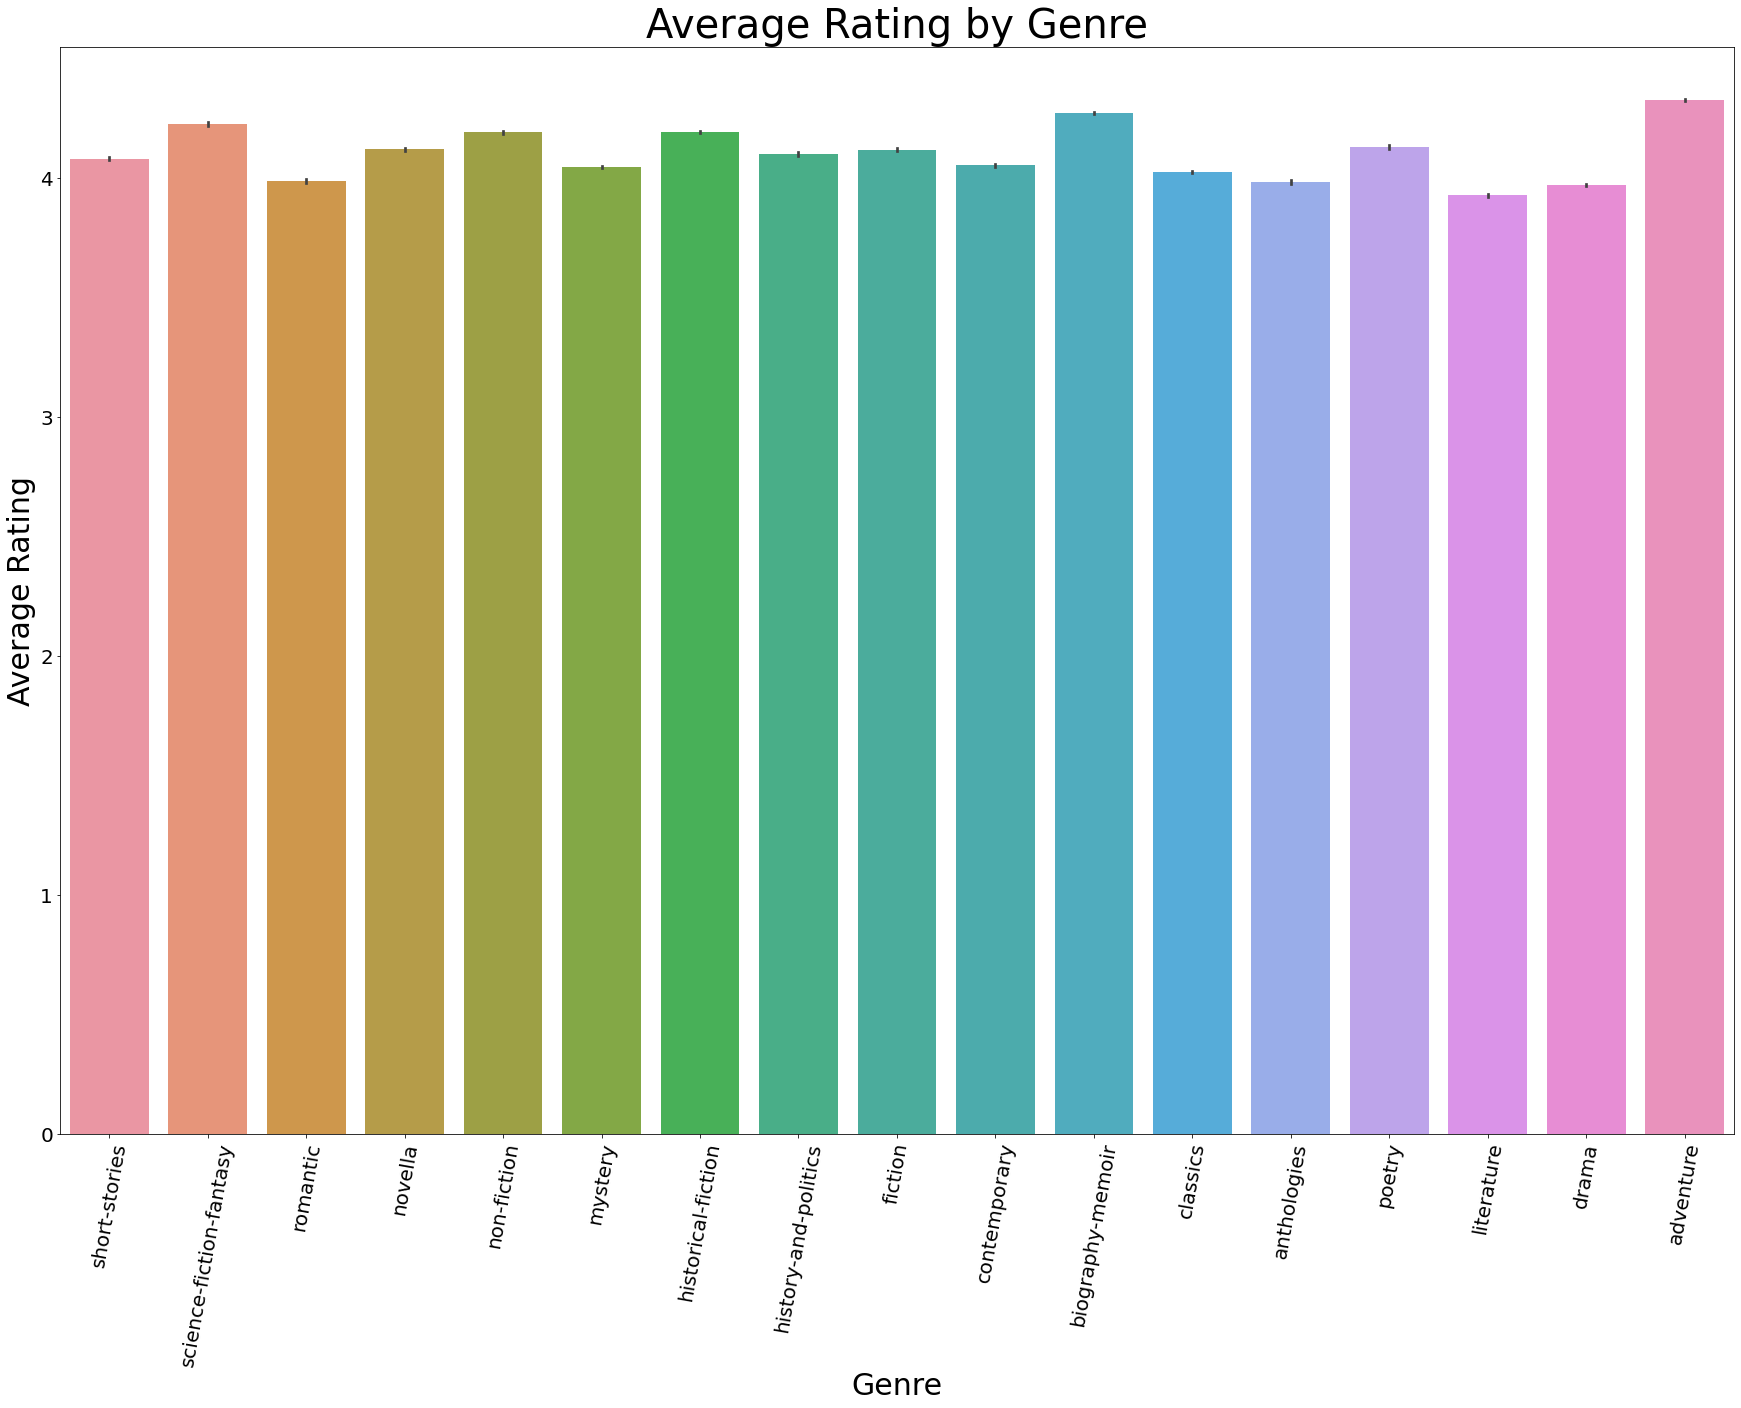

In [263]:
#y= comb_df.sort_values('average_rating', ascending=False)
plt.figure(figsize=(30,20))
sns.barplot(x=comb_df5['genre'],y=comb_df5['average_rating'])
plt.xticks(rotation= 80, size= 20)
plt.yticks(size= 20)
plt.xlabel('Genre',size='30')
plt.ylabel('Average Rating', size = 30)
plt.title('Average Rating by Genre',color='black',size='40')
plt.show()

In [22]:
df10 = pd.read_csv('comb_df7.csv')

In [27]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54387 entries, 0 to 54386
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        54387 non-null  int64  
 1   genre             54387 non-null  object 
 2   title             54387 non-null  object 
 3   author            54387 non-null  object 
 4   pages             54387 non-null  int64  
 5   average_rating    54387 non-null  float64
 6   book_description  40773 non-null  object 
 7   user_unique_key   54387 non-null  int64  
 8   number_of_stars   54387 non-null  int64  
 9   book_unique_key   54387 non-null  int64  
 10  review_text       53340 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


In [28]:
df2 = spark.read.csv('comb_df7.csv', header='true', inferSchema='true')



In [34]:
df10['user_unique_key'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
54382    False
54383    False
54384    False
54385    False
54386    False
Name: user_unique_key, Length: 54387, dtype: bool

In [29]:
df2.dtypes

[('_c0', 'string'),
 ('genre', 'string'),
 ('title', 'string'),
 ('author', 'string'),
 ('pages', 'string'),
 ('average_rating', 'string'),
 ('book_description', 'string'),
 ('user_unique_key', 'string'),
 ('number_of_stars', 'string'),
 ('book_unique_key', 'string'),
 ('review_text', 'string')]

In [ ]:
df2 = spark.read.csv('../../data/Kaggle_Dataset/bookratings_merged.csv', header='true', inferSchema='true')

### Build first simple model (FSM)

In [26]:
#sc = SparkContext('local')
spark2 = SparkSession(sc)

In [24]:
spark.createDataFrame(df10,).collect()

TypeError: field review_text: Can not merge type <class 'pyspark.sql.types.DoubleType'> and <class 'pyspark.sql.types.StringType'>

In [14]:
sp_df = spark.read.csv('comb_df7.csv', header=True, inferSchema=True)

In [20]:
sp_df.show(3)

+--------------------+--------------------+--------------------+--------------------+---------+--------------+--------------------+--------------------+---------------+---------------+-----------+
|                 _c0|               genre|               title|              author|    pages|average_rating|    book_description|     user_unique_key|number_of_stars|book_unique_key|review_text|
+--------------------+--------------------+--------------------+--------------------+---------+--------------+--------------------+--------------------+---------------+---------------+-----------+
|                   0|       short-stories|The Neil Gaiman R...|      Neil Gaiman ()|     752 |          4.54|An outstanding ar...|                null|           null|           null|       null|
|Spanning Gaiman’s...| The Neil Gaiman ...| chosen by those ...|                null|     null|          null|                null|                null|           null|           null|       null|
|A brilliant re

In [15]:
sp_df.dtypes

[('_c0', 'string'),
 ('genre', 'string'),
 ('title', 'string'),
 ('author', 'string'),
 ('pages', 'string'),
 ('average_rating', 'string'),
 ('book_description', 'string'),
 ('user_unique_key', 'string'),
 ('number_of_stars', 'string'),
 ('book_unique_key', 'string'),
 ('review_text', 'string')]

In [18]:
sp_df1 = sp_df.withColumn("user_id", sp_df['user_unique_key'].cast('int')).drop('user_unique_key')
sp_df1.show(5)
print(sp_df1.schema)

+--------------------+--------------------+--------------------+--------------------+---------+--------------+--------------------+---------------+---------------+-----------+-------+
|                 _c0|               genre|               title|              author|    pages|average_rating|    book_description|number_of_stars|book_unique_key|review_text|user_id|
+--------------------+--------------------+--------------------+--------------------+---------+--------------+--------------------+---------------+---------------+-----------+-------+
|                   0|       short-stories|The Neil Gaiman R...|      Neil Gaiman ()|     752 |          4.54|An outstanding ar...|           null|           null|       null|   null|
|Spanning Gaiman’s...| The Neil Gaiman ...| chosen by those ...|                null|     null|          null|                null|           null|           null|       null|   null|
|A brilliant repre...|          entrancing| endlessly imagin...| this captivatin

In [309]:
train, test = sp_df.randomSplit([0.8, 0.2])

In [313]:
als = ALS(maxIter=5,rank=4, regParam=0.01, 
          userCol='user_unique_key', itemCol='book_unique_key', 
          ratingCol='number_of_stars',
          coldStartStrategy='drop')


model_fsm = als.fit(train)

IllegalArgumentException: requirement failed: Column user_unique_key must be of type numeric but was actually of type string.

### FSM visualizations